In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
import urllib
%pylab inline
import os
os.getcwd()
# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_USA_accident = pd.read_csv('./data_cleaned_San Francisco.csv' , index_col=0 )
data_USA_accident.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time2YMD,Weather_Timestamp2YMD,Address
2454,A-2719054,2,2016-04-22 10:27:46,2016-04-22 16:27:46,0.564645,0.459970,0.545946,0.310060,0.114679,At Monterey Blvd/San Jose Ave - Accident.,...,False,True,False,Day,Day,Day,Day,2016-04-22,2016-04-22,nan Monterey Blvd R San Francisco US CA
4887,A-2721487,2,2016-06-09 08:50:30,2016-06-09 14:50:30,0.668873,0.667828,0.644138,0.554667,0.007985,At Army St/Potrero Ave - Accident. Left lane b...,...,False,False,False,Day,Day,Day,Day,2016-06-09,2016-06-09,nan James Lick Fwy S R San Francisco US CA
112593,A-2829193,2,2016-12-08 05:20:06,2016-12-08 11:20:06,0.508764,0.387167,0.492924,0.313690,0.002718,At Geneva Ave - Accident. Right lane blocked.,...,False,False,False,Night,Night,Night,Night,2016-12-08,2016-12-08,nan John F Foran Fwy R San Francisco US CA
113774,A-2830374,3,2016-12-15 04:57:05,2016-12-15 10:57:05,0.767704,0.650318,0.733835,0.534429,0.025314,At 7th St/Bryant St - Accident.,...,False,False,False,Night,Night,Night,Night,2016-12-15,2016-12-15,415.0 7th St L San Francisco US CA
113795,A-2830395,2,2016-12-15 07:05:00,2016-12-15 13:05:00,0.563672,0.540428,0.547518,0.486118,0.071696,At Alemany Blvd - Accident.,...,False,False,False,Night,Day,Day,Day,2016-12-15,2016-12-15,nan John F Foran Fwy R San Francisco US CA


In [3]:
data_USA_accident['Severity'].value_counts()

2    2383
1     177
3     169
4      81
Name: Severity, dtype: int64

In [4]:
data_USA_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2810 entries, 2454 to 1516015
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2810 non-null   object 
 1   Severity               2810 non-null   int64  
 2   Start_Time             2810 non-null   object 
 3   End_Time               2810 non-null   object 
 4   Start_Lat              2810 non-null   float64
 5   Start_Lng              2810 non-null   float64
 6   End_Lat                2810 non-null   float64
 7   End_Lng                2810 non-null   float64
 8   Distance(mi)           2810 non-null   float64
 9   Description            2810 non-null   object 
 10  Number                 433 non-null    float64
 11  Street                 2810 non-null   object 
 12  Side                   2810 non-null   object 
 13  City                   2810 non-null   object 
 14  County                 2810 non-null   object 
 15

In [5]:
for u in data_USA_accident.iloc[:,30:43]:
    data_USA_accident[u] = data_USA_accident[u].astype('int')
data_USA_accident.iloc[:,30:43]

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
2454,0,0,0,0,0,0,0,0,0,0,0,1,0
4887,0,0,0,0,0,0,0,0,0,0,0,0,0
112593,0,0,0,0,0,0,0,0,0,0,0,0,0
113774,0,0,0,0,0,0,0,0,0,0,0,0,0
113795,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515571,0,0,0,0,0,0,0,0,0,0,0,0,0
1515579,0,0,0,0,1,0,0,0,0,0,0,0,0
1515581,0,0,0,0,0,0,0,0,0,0,0,0,0
1515594,0,0,0,0,1,0,0,0,0,0,0,0,0


In [6]:
# one-hot encoding process
cls=['ID','Sunrise_Sunset','Civil_Twilight',
     'Nautical_Twilight']

data_onehot=data_USA_accident.merge(pd.get_dummies(data_USA_accident[cls],columns=['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight'])
                                    ,on='ID')    

data_onehot.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Astronomical_Twilight,Start_Time2YMD,Weather_Timestamp2YMD,Address,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night
0,A-2719054,2,2016-04-22 10:27:46,2016-04-22 16:27:46,0.564645,0.459970,0.545946,0.310060,0.114679,At Monterey Blvd/San Jose Ave - Accident.,...,Day,2016-04-22,2016-04-22,nan Monterey Blvd R San Francisco US CA,1,0,1,0,1,0
1,A-2721487,2,2016-06-09 08:50:30,2016-06-09 14:50:30,0.668873,0.667828,0.644138,0.554667,0.007985,At Army St/Potrero Ave - Accident. Left lane b...,...,Day,2016-06-09,2016-06-09,nan James Lick Fwy S R San Francisco US CA,1,0,1,0,1,0
2,A-2829193,2,2016-12-08 05:20:06,2016-12-08 11:20:06,0.508764,0.387167,0.492924,0.313690,0.002718,At Geneva Ave - Accident. Right lane blocked.,...,Night,2016-12-08,2016-12-08,nan John F Foran Fwy R San Francisco US CA,0,1,0,1,0,1
3,A-2830374,3,2016-12-15 04:57:05,2016-12-15 10:57:05,0.767704,0.650318,0.733835,0.534429,0.025314,At 7th St/Bryant St - Accident.,...,Night,2016-12-15,2016-12-15,415.0 7th St L San Francisco US CA,0,1,0,1,0,1
4,A-2830395,2,2016-12-15 07:05:00,2016-12-15 13:05:00,0.563672,0.540428,0.547518,0.486118,0.071696,At Alemany Blvd - Accident.,...,Day,2016-12-15,2016-12-15,nan John F Foran Fwy R San Francisco US CA,0,1,1,0,1,0


In [7]:
data_pre = data_onehot.select_dtypes(include=np.number)
col = data_onehot['ID'].str.split('-',1,expand= True)[1].astype('int')
data_pre.insert(0,'ID',col)
data_pre.head()

,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night
0,2719054,2,0.564645,0.459970,0.545946,0.310060,0.114679,NaN,0.321429,NaN,...,0,0,1,0,1,0,1,0,1,0
1,2721487,2,0.668873,0.667828,0.644138,0.554667,0.007985,NaN,0.357143,NaN,...,0,0,0,0,1,0,1,0,1,0
2,2829193,2,0.508764,0.387167,0.492924,0.313690,0.002718,NaN,0.176786,NaN,...,0,0,0,0,0,1,0,1,0,1
3,2830374,3,0.767704,0.650318,0.733835,0.534429,0.025314,0.061846,0.337500,NaN,...,0,0,0,0,0,1,0,1,0,1
4,2830395,2,0.563672,0.540428,0.547518,0.486118,0.071696,NaN,0.337500,NaN,...,0,0,0,0,0,1,1,0,1,0


In [8]:
data_pre = data_pre.drop(labels = 'Number',axis=1)
data_pre = data_pre.dropna(axis=0,how='any')

In [9]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 16 to 2809
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2665 non-null   int64  
 1   Severity                 2665 non-null   int64  
 2   Start_Lat                2665 non-null   float64
 3   Start_Lng                2665 non-null   float64
 4   End_Lat                  2665 non-null   float64
 5   End_Lng                  2665 non-null   float64
 6   Distance(mi)             2665 non-null   float64
 7   Temperature(F)           2665 non-null   float64
 8   Wind_Chill(F)            2665 non-null   float64
 9   Humidity(%)              2665 non-null   float64
 10  Pressure(in)             2665 non-null   float64
 11  Visibility(mi)           2665 non-null   float64
 12  Wind_Speed(mph)          2665 non-null   float64
 13  Precipitation(in)        2665 non-null   float64
 14  Amenity                

In [76]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle
from imblearn.over_sampling import RandomOverSampler, SMOTE
import seaborn as sns

dataset = data_pre.values

In [136]:
# xgboost classification and parameter tuning
X = dataset[:,2:]
Y = dataset[:,1]

seed = 123
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

smote = SMOTE(random_state=0)  
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)  
X_test_smt, y_test_smt = smote.fit_resample(X_test, y_test)  

# tuning best 'max_depth' and 'min_child_weight'
param_test1 = {'max_depth':range(3,10,1),'min_child_weight':range(1,6,1)}
gsearch1 = GridSearchCV(estimator = XGBClassifier(eval_metric=['mlogloss','auc','merror'],
                                                  learning_rate = 0.1,
                                                  n_estimators=100,
                                                  gamma=0,
                                                  subsample=0.5,
                                                  colsample_bytree=0.5, 
                                                  objective='multi:softmax',
                                                  num_class=4, 
                                                  nthread=4,
                                                  seed=27),
                                    param_grid = param_test1, 
                                                scoring='roc_auc_ovr',
                                                n_jobs=4, 
                                                cv=5)
gsearch1.fit(X_train_smt,y_train_smt)
best_max_depth, best_min_child_weight = gsearch1.best_params_['max_depth'],gsearch1.best_params_['min_child_weight']

print(gsearch1.best_params_, gsearch1.best_score_)

[16:25:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 9, 'min_child_weight': 1} 0.968211988396314


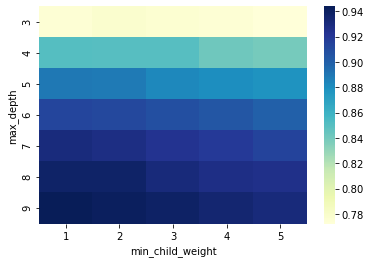

In [110]:
#heatmap visulazation
grid_vis = []
for pair in gsearch1.cv_results_['mean_test_score']:
    grid_vis.append(pair)
grid_vis = np.array(grid_vis)
grid_vis.shape = (7, 5)
sns.heatmap(grid_vis,cmap='YlGnBu')
plt.xticks(np.arange(5)+0.5,gsearch1.param_grid['min_child_weight'])
plt.yticks(np.arange(7)+0.5,gsearch1.param_grid['max_depth'])
plt.xlabel('min_child_weight')
plt.ylabel('max_depth')
plt.show()

In [111]:
# tuning best 'gamma'
param_test2 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier(eval_metric=['mlogloss','auc','merror'],
                                                  learning_rate = 0.1,
                                                  n_estimators=100,
                                                  subsample=0.5,
                                                  colsample_bytree=0.5, 
                                                  max_depth= best_max_depth,
                                                  min_child_weight=best_min_child_weight,
                                                  objective='multi:softmax',
                                                  num_class=4, 
                                                  nthread=4, 
                                                  seed=27),
                                    param_grid = param_test2, 
                                                scoring='accuracy',
                                                n_jobs=4, 
                                                cv=5)

gsearch2.fit(X_train_smt,y_train_smt)
best_gamma = gsearch2.best_params_['gamma']

print(gsearch2.best_params_, gsearch2.best_score_)

{'gamma': 0.3} 0.9459461021929367


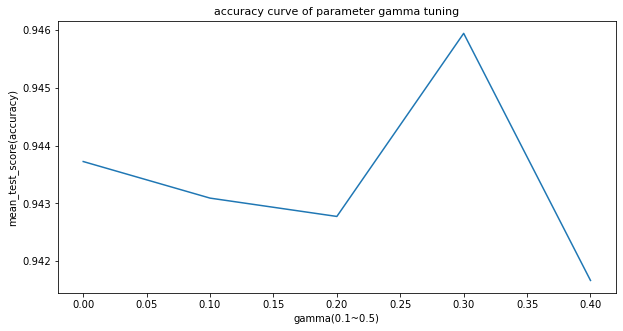

In [119]:
gsearch2.cv_results_['mean_test_score']
plt.figure(figsize=[10,5])
plt.plot(np.array(gsearch2.param_grid['gamma']),gsearch2.cv_results_['mean_test_score'])
plt.xlabel('gamma(0.1~0.5)')
plt.ylabel('mean_test_score(accuracy)')
plt.title('accuracy curve of parameter gamma tuning', size=11)
plt.show()

In [120]:
# tuning best 'subsample' and 'colsample_bytree'
param_test3 = {'subsample':[i/10.0 for i in range(5,10)],'colsample_bytree':[i/10.0 for i in range(5,10)]}
gsearch3 = GridSearchCV(estimator = XGBClassifier(eval_metric=['mlogloss','auc','merror'],
                                                  learning_rate = 0.1,
                                                  n_estimators=100,
                                                  gamma=best_gamma, 
                                                  max_depth= best_max_depth,
                                                  min_child_weight=best_min_child_weight,
                                                  objective='multi:softmax',
                                                  num_class=4, 
                                                  nthread=4, 
                                                  seed=27),
                                    param_grid = param_test3, 
                                                scoring='accuracy',
                                                n_jobs=4, 
                                                cv=5)

gsearch3.fit(X_train_smt,y_train_smt)
best_colsample_bytree, best_subsample = gsearch3.best_params_['colsample_bytree'],gsearch3.best_params_['subsample']

print(gsearch3.best_params_, gsearch3.best_score_)

{'colsample_bytree': 0.9, 'subsample': 0.8} 0.9516515833407693


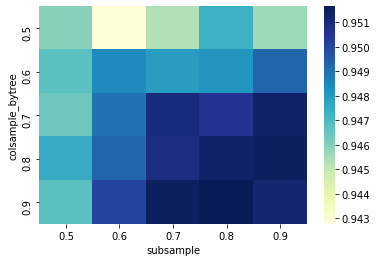

In [123]:
#heatmap visulazation
grid_vis = []
for pair in gsearch3.cv_results_['mean_test_score']:
    grid_vis.append(pair)
grid_vis = np.array(grid_vis)
grid_vis.shape = (5, 5)
sns.heatmap(grid_vis,cmap='YlGnBu')
plt.xticks(np.arange(5)+0.5,gsearch3.param_grid['subsample'])
plt.yticks(np.arange(5)+0.5,gsearch3.param_grid['colsample_bytree'])
plt.xlabel('subsample')
plt.ylabel('colsample_bytree')
plt.show()

In [124]:
# tuning best 'reg_alpha' and 'reg_lambda'
param_test4 = {'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],'reg_lambda':[0, 0.001, 0.005, 0.01, 0.05]}
gsearch4 = GridSearchCV(estimator = XGBClassifier(eval_metric=['mlogloss','auc','merror'],
                                                  learning_rate = 0.1,
                                                  n_estimators=100,
                                                  gamma=best_gamma, 
                                                  subsample=best_subsample,
                                                  colsample_bytree=best_colsample_bytree, 
                                                  max_depth= best_max_depth,
                                                  min_child_weight=best_min_child_weight,
                                                  objective='multi:softmax',
                                                  num_class=4, 
                                                  nthread=4, 
                                                  seed=27),
                                    param_grid = param_test4, 
                                                scoring='accuracy',
                                                n_jobs=4, 
                                                cv=5)

gsearch4.fit(X_train_smt,y_train_smt)
best_reg_alpha,best_reg_lambda = gsearch4.best_params_['reg_alpha'], gsearch4.best_params_['reg_lambda']

print(gsearch4.best_params_, gsearch4.best_score_)

{'reg_alpha': 0.001, 'reg_lambda': 0.001} 0.9533952250308223


In [27]:
# tuning best 'n_estimators'
param_test5 = {'n_estimators':range(50,201,10)}
gsearch5 = GridSearchCV(estimator = XGBClassifier(eval_metric=['mlogloss','auc','merror'],
                                                  learning_rate = 0.1,
                                                  gamma=best_gamma, 
                                                  subsample=best_subsample,
                                                  reg_alpha=best_reg_alpha,
                                                  reg_lambda=best_rag_lambda,
                                                  colsample_bytree=best_colsample_bytree, 
                                                  max_depth= best_max_depth,
                                                  min_child_weight=best_min_child_weight,
                                                  objective='multi:softmax',
                                                  num_class=4, 
                                                  nthread=4, 
                                                  seed=27),
                                    param_grid = param_test5, 
                                                scoring='accuracy',
                                                n_jobs=4, 
                                                cv=5)

gsearch5.fit(X_train_smt,y_train_smt)
best_n_estimators = gsearch5.best_params_['n_estimators']

print(gsearch5.best_params_, gsearch5.best_score_)

{'n_estimators': 200} 0.9751142089077293


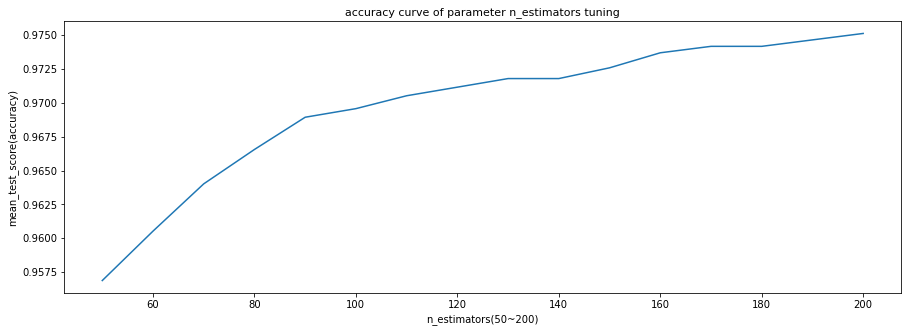

In [125]:
gsearch5.cv_results_['mean_test_score']
plt.figure(figsize=[15,5])
plt.plot(np.array(gsearch5.param_grid['n_estimators']),gsearch5.cv_results_['mean_test_score'])
plt.xlabel('n_estimators(50~200)')
plt.ylabel('mean_test_score(accuracy)')
plt.title('accuracy curve of parameter n_estimators tuning', size=11)
plt.show()

In [139]:
#Train the model again with the obtained optimal parameters
best_xgb = XGBClassifier(eval_metric=['mlogloss','auc','merror'],
                                                  learning_rate = 0.1,
                                                  gamma=best_gamma, 
                                                  subsample=best_subsample,
                                                  reg_alpha=best_reg_alpha,
                                                  reg_lambda=best_reg_lambda,
                                                  colsample_bytree=best_colsample_bytree, 
                                                  max_depth= best_max_depth,
                                                  min_child_weight=best_min_child_weight,
                                                  n_estimators=best_n_estimators,
                                                  objective='multi:softmax',
                                                  num_class=4, 
                                                  nthread=4, 
                                                  seed=27)
best_xgb.fit(X_train,y_train)

y_pred = best_xgb.predict(X_test)
y_pred_prob = best_xgb.predict_proba(X_test)

Xgbc_accuracy_score=accuracy_score(y_test,y_pred)
Xgbc_preci_score=precision_score(y_test,y_pred,average='macro')
Xgbc_recall_score=recall_score(y_test,y_pred,average='macro')
Xgbc_f1_score=f1_score(y_test,y_pred,average='macro')
Xgbc_auc=roc_auc_score(y_test,y_pred_prob,multi_class='ovr')

print('Xgbc_accuracy_score: %f\n Xgbc_preci_score: %f\n Xgbc_recall_score: %f\n Xgbc_f1_score: %f\n Xgbc_auc: %f\n'
      %(Xgbc_accuracy_score,Xgbc_preci_score,Xgbc_recall_score,Xgbc_f1_score,Xgbc_auc))




Xgbc_accuracy_score: 0.925000
 Xgbc_preci_score: 0.774684
 Xgbc_recall_score: 0.681558
 Xgbc_f1_score: 0.717091
 Xgbc_auc: 0.933570



In [150]:
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False,
              eval_metric=['mlogloss', 'auc', 'merror'], gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, nthread=4, num_class=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=27, reg_alpha=0.001, reg_lambda=0.001,
              scale_pos_weight=None, seed=27, subsample=0.8, ...)

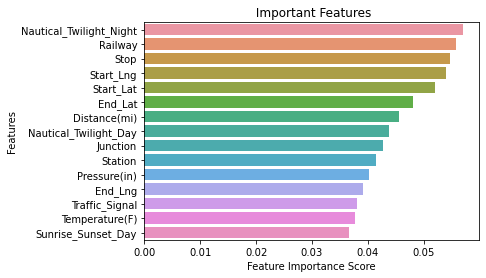

In [147]:
feature = pd.Series(best_xgb.feature_importances_,index=data_pre.iloc[:,2:].columns).sort_values(ascending=False)
sns.barplot(feature[:15], feature.index[:15])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title(" Important Features")
plt.show()

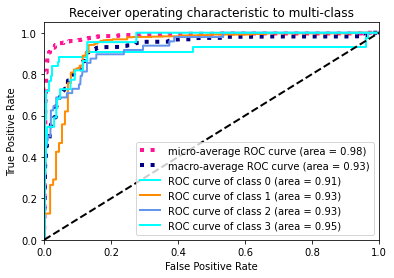

In [149]:
# calculate ROC for each class
n_classes=4
y_t = label_binarize(y_test, classes=[1, 2, 3, 4])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_t[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_t.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=2
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()